In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

import numpy as np
import scipy.stats as st

In [4]:
flipkart_sales=pd.read_csv('/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv')
flipkart_sales

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flipkart_sales.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
df=pd.DataFrame({'product_name':flipkart_sales['product_name'],'retail_price':flipkart_sales['retail_price'],'discounted_price':flipkart_sales['discounted_price'],'brand':flipkart_sales['brand'],})
df['product_name']=flipkart_sales['product_name']
df

,product_name,retail_price,discounted_price,brand
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor
2,AW Bellies,999.0,499.0,AW
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons
...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,1299.0,999.0,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,Elite Collection
19999,Elite Collection Medium Acrylic Sticker,1499.0,999.0,Elite Collection
20000,NaN,NaN,NaN,NaN


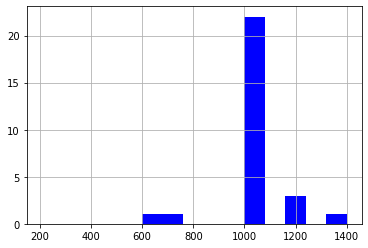

In [18]:
members=df.loc[df['product_name']=='Elite Collection Medium Acrylic Sticker']
memberstot=members['discounted_price']
normal=df.loc[df['product_name']=='Sicons All Purpose Arnica Dog Shampoo']
normaltot=normal['discounted_price']
normaltot.hist(color='red')
memberstot.hist(color='blue')



# Hypotheisis



H0: The avg discounted price of the brands 109F Solid Women's Tunic and 109f Checkered Women's Regular Skirt are same.

H1: the avg discounted price of the brands109F Solid Women's Tunic is less than 109f Checkered Women's Regular Skirt are same.


In [29]:
df.groupby('product_name').mean()

k=df[df["product_name"]=='Elite Collection Medium Acrylic Sticker']
me_K=k.discounted_price.mean()
print(me_K)

1011.5


In [28]:
df.groupby('product_name').mean()

a=df[df["product_name"]=='Sicons All Purpose Arnica Dog Shampoo']
me_a=a.discounted_price.mean()
print(me_a)

210.0


In [11]:
means=df.groupby('product_name').mean()
means

,retail_price,discounted_price
product_name,,
109F Solid Women's Tunic,1499.0,1049.0
109f Checkered Women's Regular Skirt,1499.0,750.0
11e Women Flats,499.0,349.0
1OAK Women's Floral Print Casual Shirt,899.0,675.0
1OAK Women's Polka Print Casual Shirt,799.0,599.0
...,...,...
"youniqueshop Plastic, Stainless Steel Hand Juicer",810.0,640.0
zDelhi.com Car Washer Z1 Ultra High Pressure Washer,4499.0,3999.0
zaidis data_cable USB Cable,150.0,129.0


In [24]:
difference=me_K-me_a
observed_difference=difference
observed_difference

801.5

In [30]:
df.iloc[123]

product_name        Rochees RW50 Analog Watch  - For Boys
retail_price                                       1120.0
discounted_price                                    952.0
brand                                                 NaN
Name: 123, dtype: object

In [39]:
randomsamples=df.sample(20002,replace=False)
randomsamples

,product_name,retail_price,discounted_price,brand
10860,HomeeHub Polyester Multicolor Self Design Eyel...,1999.0,1332.0,HomeeHub
18724,Abhushan Alloy Jewel Set,2299.0,949.0,Abhushan
14637,Provalley Printed Boy's Round Neck T-Shirt,1449.0,799.0,NaN
8096,Ocean CPGW087,1499.0,643.0,Ocean
10951,InnovationTheStore Self Design Basic Cap Cap,2999.0,2999.0,NaN
...,...,...,...,...
164,"Q&Q VQ13-008 Analog Watch - For Girls, Boys",585.0,526.0,NaN
830,Enah Casual Sleeveless Printed Women's Top,999.0,795.0,NaN
6988,Denver Brave Hamilton Honour Combo Set,379.0,370.0,NaN
11905,Goodwill Impex Women's Solid Casual Shirt,800.0,399.0,Regular


In [40]:
randomsamples['discounted_price']

10860    1332.0
18724     949.0
14637     799.0
8096      643.0
10951    2999.0
          ...  
164       526.0
830       795.0
6988      370.0
11905     399.0
10531     959.0
Name: discounted_price, Length: 20002, dtype: float64

In [67]:
osh=df.copy()
osh

,product_name,retail_price,discounted_price,brand
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor
2,AW Bellies,999.0,499.0,AW
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons
...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,1299.0,999.0,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,Elite Collection
19999,Elite Collection Medium Acrylic Sticker,1499.0,999.0,Elite Collection
20000,NaN,NaN,NaN,NaN


In [68]:
osh['shuffled']=randomsamples['discounted_price'].values
os

,product_name,discounted_price,shuffled
0,Alisha Solid Women's Cycling Shorts,379.0,1332.0
1,FabHomeDecor Fabric Double Sofa Bed,22646.0,949.0
2,AW Bellies,499.0,799.0
3,Alisha Solid Women's Cycling Shorts,267.0,643.0
4,Sicons All Purpose Arnica Dog Shampoo,210.0,2999.0
...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,999.0,526.0
19998,Elite Collection Medium Acrylic Sticker,1199.0,795.0
19999,Elite Collection Medium Acrylic Sticker,999.0,370.0
20000,NaN,NaN,399.0


In [69]:
osh.columns

Index(['product_name', 'retail_price', 'discounted_price', 'brand',
       'shuffled'],
      dtype='object')

In [70]:
osh.drop(['retail_price'], axis=1,inplace=True)

In [72]:
osh

,product_name,discounted_price,brand,shuffled
0,Alisha Solid Women's Cycling Shorts,379.0,Alisha,1332.0
1,FabHomeDecor Fabric Double Sofa Bed,22646.0,FabHomeDecor,949.0
2,AW Bellies,499.0,AW,799.0
3,Alisha Solid Women's Cycling Shorts,267.0,Alisha,643.0
4,Sicons All Purpose Arnica Dog Shampoo,210.0,Sicons,2999.0
...,...,...,...,...
19997,Elite Collection Medium Acrylic Sticker,999.0,Elite Collection,526.0
19998,Elite Collection Medium Acrylic Sticker,1199.0,Elite Collection,795.0
19999,Elite Collection Medium Acrylic Sticker,999.0,Elite Collection,370.0
20000,NaN,NaN,NaN,399.0


In [74]:
group_means= osh.groupby('brand').mean()
group_means

,discounted_price,shuffled
brand,,
1OAK,637.000000,1249.000000
3D Mat,6999.000000,1599.000000
3a AUTOCARE,1827.826087,1306.304348
3a Autocare,1783.000000,872.222222
3kFactory,174.000000,1790.000000
...,...,...
youniqueshop,640.000000,299.000000
zDelhi.com,3999.000000,1099.000000
zaidis,129.000000,199.000000


In [79]:
for i in range(1,3499):
  difference = group_means['shuffled'][i-1]- group_means['shuffled'][i]
difference

168.0

In [83]:
original = flipkart_sales[['product_name', 'discounted_price']]
shuffled = original.sample(20002,replace = False)
shuffled_total = shuffled['discounted_price']
original_shuffled = original.assign(shuffled_total=shuffled_total.values )
group_means= osh.groupby('product_name').mean()
group_means

,discounted_price,shuffled
product_name,,
109F Solid Women's Tunic,1049.0,404.0
109f Checkered Women's Regular Skirt,750.0,195.0
11e Women Flats,349.0,375.0
1OAK Women's Floral Print Casual Shirt,675.0,2299.0
1OAK Women's Polka Print Casual Shirt,599.0,199.0
...,...,...
"youniqueshop Plastic, Stainless Steel Hand Juicer",640.0,299.0
zDelhi.com Car Washer Z1 Ultra High Pressure Washer,3999.0,1099.0
zaidis data_cable USB Cable,129.0,199.0


In [99]:
import numpy as np
import array
differences = np.zeros(500)
for i in np.arange(500):
    original = flipkart_sales[['product_name', 'discounted_price']]
    shuffled = original.sample(20002,replace = False)
    shuffled_total = shuffled['discounted_price']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('product_name').mean()
    differences[i] = difference
    for i in range(1,500):
        difference = group_means['shuffled_total'][i-1]- group_means['shuffled_total'][i]


In [100]:
difference


-356.0

In [101]:
differences_df=pd.DataFrame(differences)
differences_df

,0
0,150.0
1,-341.0
2,1295.0
3,-175.0
4,-1500.0
...,...
495,34651.0
496,367.0
497,800.0
498,-19125.0


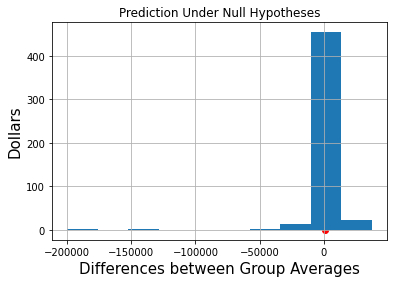

In [102]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

In [103]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.826

Emperical value is grater than p value is 0.05.hence Fail to reject the null hypotheisis.